In [1]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from dateutil.relativedelta import relativedelta
import seaborn as sns
from wishpy.dataworker import DataWorker
dw = DataWorker(google_secret='../../../wishpy/client_secret.json')
import math

# from scipy import stats
from scipy.stats import chi2, chi2_contingency
import statsmodels.stats.api as sms

import ttd_experiment as ttd

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/wishpy/dataworker.py:83: UserWarning: [Errno 2] No such file or directory: '../../../wishpy/client_secret.json'
  warnings.warn(str(e))


## Prepare the data

In [3]:
df_cond = dw.td_query('''
'''
,job_id=745792714
,engine='presto'
                )
df_cond.head(5)

You can look at job id 745792714


,country_code,user_first_txn_refund_category,cumulative_refunds_perc_bucket,carrier_ttd_mean_bucket,carrier_ttd_med_bucket,mixed_ttd_mean_bucket,mixed_ttd_med_bucket,max_ttd_shown_mean_bucket,max_ttd_shown_med_bucket,min_ttd_shown_mean_bucket,min_ttd_shown_med_bucket,late_carrier_ttd_diff_mean_bucket,late_mixed_ttd_diff_mean_bucket,late_carrier_delivery_perc_bucket,late_mixed_delivery_perc_bucket,logistics_o_overall_refund_bucket,llr_bucket,first_order_deliveried_group,conditional_month_bucket,conditional_returned_user
0,AU,logistics refund,0,20-,20-,20-,20-,20-,20-,20-,20-,0-,0-,5-10,5-10,50+,30-50,2nd order before,conditional_month_0,1
1,AU,logistics refund,0,20-,20-,20-,20-,20-,20-,20-,20-,0-10,0-10,10-30,10-30,50+,10-30,2nd order after,conditional_month_0,1
2,AU,logistics refund,0,20-,20-,20-,20-,20-,20-,20-,20-,0-10,0-10,30-50,30-50,50+,10-30,2nd order before,conditional_month_0,1
3,AU,logistics refund,0,20-,20-,20-,20-,20-,20-,20-,20-,0-10,0-10,30-50,30-50,50+,10-30,2nd order before,conditional_month_5,1
4,AU,logistics refund,0,20-,20-,20-,20-,20-,20-,20-,20-,0-10,0-10,50+,50+,50+,30-50,2nd order before,conditional_month_0,1


In [2]:
df_m = dw.td_query('''
'''
,job_id=741650777
,engine='presto'
                )
df_m.head(5)

You can look at job id 745792714


,country_code,user_first_txn_refund_category,cumulative_refunds_perc_bucket,carrier_ttd_mean_bucket,carrier_ttd_med_bucket,mixed_ttd_mean_bucket,mixed_ttd_med_bucket,max_ttd_shown_mean_bucket,max_ttd_shown_med_bucket,min_ttd_shown_mean_bucket,min_ttd_shown_med_bucket,late_carrier_ttd_diff_mean_bucket,late_mixed_ttd_diff_mean_bucket,late_carrier_delivery_perc_bucket,late_mixed_delivery_perc_bucket,logistics_o_overall_refund_bucket,llr_bucket,first_order_deliveried_group,conditional_month_bucket,conditional_returned_user
0,AU,logistics refund,0,20-,20-,20-,20-,20-,20-,20-,20-,0-,0-,5-10,5-10,50+,30-50,2nd order before,conditional_month_0,1
1,AU,logistics refund,0,20-,20-,20-,20-,20-,20-,20-,20-,0-10,0-10,10-30,10-30,50+,10-30,2nd order after,conditional_month_0,1
2,AU,logistics refund,0,20-,20-,20-,20-,20-,20-,20-,20-,0-10,0-10,30-50,30-50,50+,10-30,2nd order before,conditional_month_0,1
3,AU,logistics refund,0,20-,20-,20-,20-,20-,20-,20-,20-,0-10,0-10,30-50,30-50,50+,10-30,2nd order before,conditional_month_5,1
4,AU,logistics refund,0,20-,20-,20-,20-,20-,20-,20-,20-,0-10,0-10,50+,50+,50+,30-50,2nd order before,conditional_month_0,1


In [34]:
months = ['month_0_user','month_1_user','month_2_user','month_3_user','month_4_user','month_5_user','month_6_user','month_7_user','month_8_user','month_9_user','month_10_user',
         'month_11_user','month_12_user','month_13_plus_user']
months_p = ['month_0_user_p','month_1_user_p','month_2_user_p','month_3_user_p','month_4_user_p','month_5_user_p','month_6_user_p','month_7_user_p','month_8_user_p','month_9_user_p','month_10_user_p',
         'month_11_user_p','month_12_user_p','month_13_plus_user_p']

# for month, month_p in zip(months,months_p):
#     df[month_p] = df.apply(lambda row: round(100*row[month]/(row['month_0_user']+0.001),2),axis=1)
# df.head(10)

In [28]:
# for month, month_p in zip(months,months_p):
#     df_m[month_p] = df_m.apply(lambda row: round(100*row[month]/(row['month_0_user']+0.00001),2),axis=1)
# df_m.head(5)

,country_code,user_first_txn_refund_category,cumulative_refunds_perc_bucket,carrier_ttd_mean_bucket,carrier_ttd_med_bucket,mixed_ttd_mean_bucket,mixed_ttd_med_bucket,max_ttd_shown_mean_bucket,max_ttd_shown_med_bucket,min_ttd_shown_mean_bucket,...,month_4_user_p,month_5_user_p,month_6_user_p,month_7_user_p,month_8_user_p,month_9_user_p,month_10_user_p,month_11_user_p,month_12_user_p,month_13_plus_user_p
0,AU,None,0,20-,20-,20-,20-,20-,20-40,20-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AU,None,0,20-,20-,20-,20-,20-40,20-40,20-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AU,None,0,20-,20-,20-40,20-,20-40,20-40,20-,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AU,None,0,20-,20-,20-40,20-,20-40,20-40,20-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AU,None,0,20-40,20-40,20-40,20-,20-40,20-40,20-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_w = dw.td_query('''
'''
,job_id=741651179
,engine='presto'
                )
df_w.head(5)

You can look at job id 741651179


,country_code,user_first_txn_refund_category,cumulative_refunds_perc_bucket,carrier_ttd_mean_bucket,carrier_ttd_med_bucket,mixed_ttd_mean_bucket,mixed_ttd_med_bucket,max_ttd_shown_mean_bucket,max_ttd_shown_med_bucket,min_ttd_shown_mean_bucket,...,week_8_user,week_9_user,week_10_user,week_11_user,week_12_user,week_13_user,week_14_user,week_15_user,week_16_user,week_17plus_user
0,AU,None,0,20-,20-,20-,20-,20-,20-40,20-,...,0,0,0,0,0,0,0,0,0,0
1,AU,None,0,20-,20-,20-,20-,20-40,20-40,20-,...,1,1,1,1,0,0,0,0,0,0
2,AU,None,0,20-,20-,20-40,20-,20-40,20-40,20-,...,0,0,0,0,0,0,0,0,0,1
3,AU,None,0,20-,20-,20-40,20-,20-40,20-40,20-,...,0,0,0,0,0,0,0,0,0,0
4,AU,None,0,20-40,20-40,20-40,20-,20-40,20-40,20-,...,0,0,0,0,0,0,0,0,0,0


In [37]:
weeks = ['week_0_user','week_1_user','week_2_user','week_3_user','week_4_user','week_5_user','week_6_user','week_7_user','week_8_user','week_9_user','week_10_user',
         'week_11_user','week_12_user','week_13_user','week_14_user','week_15_user','week_16_user']
weeks_p = ['week_0_user_p','week_1_user_p','week_2_user_p','week_3_user_p','week_4_user_p','week_5_user_p','week_6_user_p','week_7_user_p','week_8_user_p','week_9_user_p','week_10_user_p',
         'week_11_user_p','week_12_user_p','week_13_user_p','week_14_user_p','week_15_user_p','week_16_user_p']

In [38]:
# for week, week_p in zip(weeks,weeks_p):
#     df_w[week_p] = df_w.apply(lambda row: round(100*row[week]/(row['week_0_user']+0.00001),2),axis=1)
# df_w.head(10)

## Plot of retention

### overall monthly retention plot

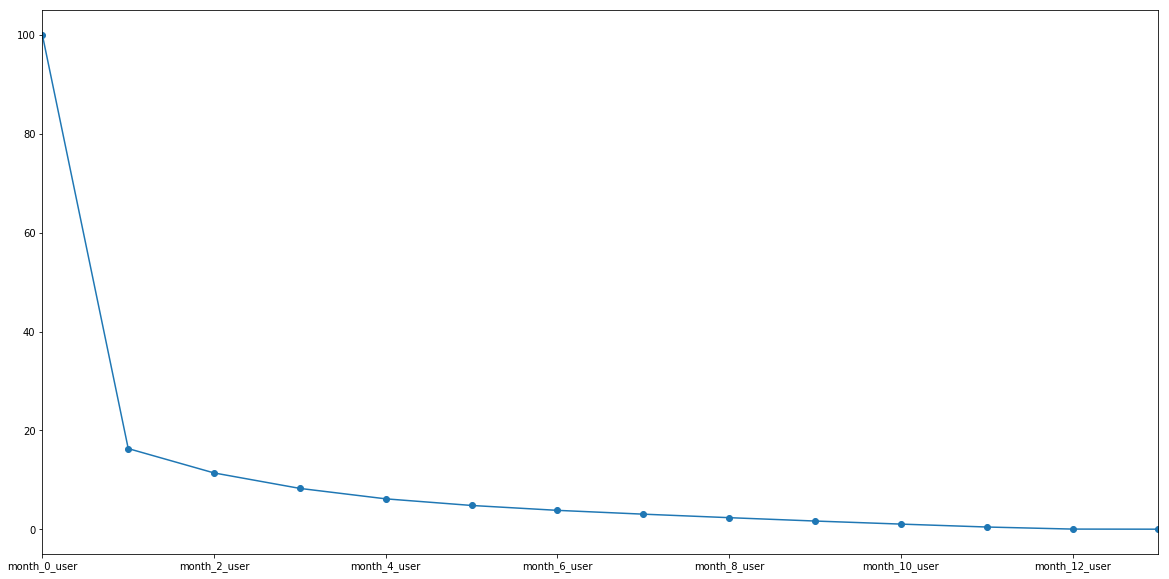

In [48]:
df_dim = pd.DataFrame(df_m[months].agg('sum'),columns=['user_cnt'])
df_dim['user_p'] = round(100*df_dim.user_cnt /df_dim.loc['month_0_user','user_cnt'],2)
df_dim['user_p'].plot(figsize=(20, 10),linestyle='-', marker='o')

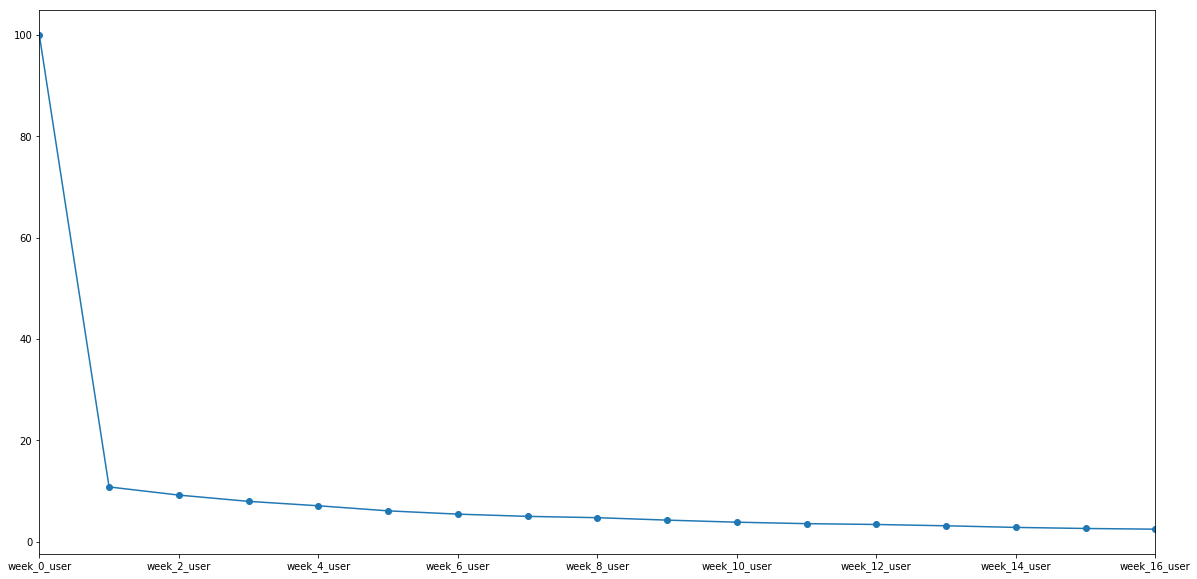

In [51]:
df_dim = pd.DataFrame(df_w[weeks].agg('sum'),columns=['user_cnt'])
df_dim['user_p'] = round(100*df_dim.user_cnt /df_dim.loc['week_0_user','user_cnt'],2)
df_dim['user_p'].plot(figsize=(20, 10),linestyle='-', marker='o')

In [22]:
# df_overall_month = df.loc[df.dimension=='overall_month',].melt(id_vars=['dimension','dim_value'], 
#                                                                value_vars=months_p,
#                                                                var_name='month_bucket', value_name='month_value').sort_values(by='month_value',ascending=False).set_index('month_bucket')
# df_overall_month 
# df_overall_month.plot(y='month_value',figsize=(20, 10),linestyle='-', marker='o')

### All possible dim/cut

In [53]:
df_m.head()

,country_code,user_first_txn_refund_category,cumulative_refunds_perc_bucket,carrier_ttd_mean_bucket,carrier_ttd_med_bucket,mixed_ttd_mean_bucket,mixed_ttd_med_bucket,max_ttd_shown_mean_bucket,max_ttd_shown_med_bucket,min_ttd_shown_mean_bucket,...,month_4_user,month_5_user,month_6_user,month_7_user,month_8_user,month_9_user,month_10_user,month_11_user,month_12_user,month_13_plus_user
0,AU,None,0,20-,20-,20-,20-,20-,20-40,20-,...,0,0,0,0,0,0,0,0,0,0
1,AU,None,0,20-,20-,20-,20-,20-40,20-40,20-,...,0,0,0,0,0,0,0,0,0,0
2,AU,None,0,20-,20-,20-40,20-,20-40,20-40,20-,...,0,0,1,0,0,0,0,0,0,0
3,AU,None,0,20-,20-,20-40,20-,20-40,20-40,20-,...,0,0,0,0,0,0,0,0,0,0
4,AU,None,0,20-40,20-40,20-40,20-,20-40,20-40,20-,...,0,0,0,0,0,0,0,0,0,0


In [76]:
def retention_dim_plot2(df,dim_name):
    
    months = ['month_0_user','month_1_user','month_2_user','month_3_user','month_4_user','month_5_user','month_6_user','month_7_user','month_8_user','month_9_user',
              'month_10_user','month_11_user','month_12_user']
    months_p = ['month_0_user_p','month_1_user_p','month_2_user_p','month_3_user_p','month_4_user_p','month_5_user_p','month_6_user_p','month_7_user_p','month_8_user_p',
                'month_9_user_p','month_10_user_p','month_11_user_p','month_12_user_p']
    
    df_m_dim = df.groupby(dim_name,as_index=False)[months].sum()
    
    for month, month_p in zip(months,months_p):
        df_m_dim[month_p] = df_m_dim.apply(lambda row: round(100*row[month]/(row['month_0_user']+0.0001),2),axis=1)
        
    df_m_dim2 = df_m_dim.melt(id_vars=[dim_name], 
                         value_vars=months_p, 
                         var_name='month_bucket', 
                         value_name='bucket_value')

    x=list(set(df_m_dim2[dim_name]))
    
    df_m_dim3 = df_m_dim2.pivot_table(columns=dim_name, values='bucket_value', index='month_bucket').sort_values(by=x[0],ascending=False)

    df_m_dim3.plot(figsize=(20, 10),linestyle='-', marker='o',title='monthly retention chart, by dim - {}'.format(dim_name))

In [74]:
months = ['month_0_user','month_1_user','month_2_user','month_3_user','month_4_user','month_5_user','month_6_user','month_7_user','month_8_user','month_9_user','month_10_user',
         'month_11_user','month_12_user']
months_p = ['month_0_user_p','month_1_user_p','month_2_user_p','month_3_user_p','month_4_user_p','month_5_user_p','month_6_user_p','month_7_user_p','month_8_user_p','month_9_user_p','month_10_user_p',
         'month_11_user_p','month_12_user_p']

# df_m_dim = df_m.groupby('user_first_txn_refund_category',as_index=False)[months].sum()

# for month, month_p in zip(months,months_p):
#     df_m_dim[month_p] = df_m_dim.apply(lambda row: round(100*row[month]/(row['month_0_user']+0.001),2),axis=1)

In [103]:
def retention_dim_plot(df,dim_name):
    months_p = ['month_0_user_p','month_1_user_p','month_2_user_p','month_3_user_p','month_4_user_p','month_5_user_p','month_6_user_p','month_7_user_p','month_8_user_p','month_9_user_p','month_10_user_p',
         'month_11_user_p','month_12_user_p','month_13_plus_user_p']

    df_dim = df.loc[df.dimension==dim_name,].melt(id_vars=['dimension','dim_value'], 
                                                               value_vars=months_p,
                                                               var_name='month_bucket', value_name='month_value').\
                                                               sort_values(by='month_value',ascending=False).set_index('month_bucket')
    x=list(set(df_dim['dim_value']))
    
    df_dim_2 = df_dim.pivot_table(columns='dim_value', values='month_value', index='month_bucket').\
                        sort_values(by=x[1],ascending=False)
    
    df_dim_2.plot(figsize=(20, 10),linestyle='-', marker='o',title='monthly retention chart, by dim - {}'.format(dim_name))

### overall_month_age 

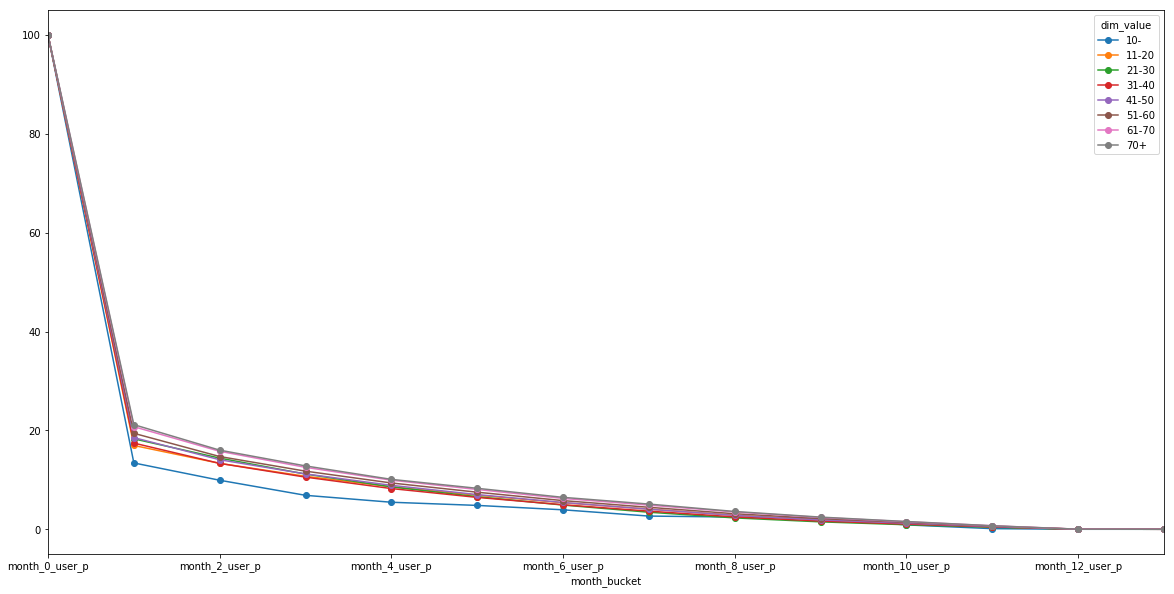

In [87]:
retention_dim_plot2(df,'overall_month_age')

### overall_month_gender

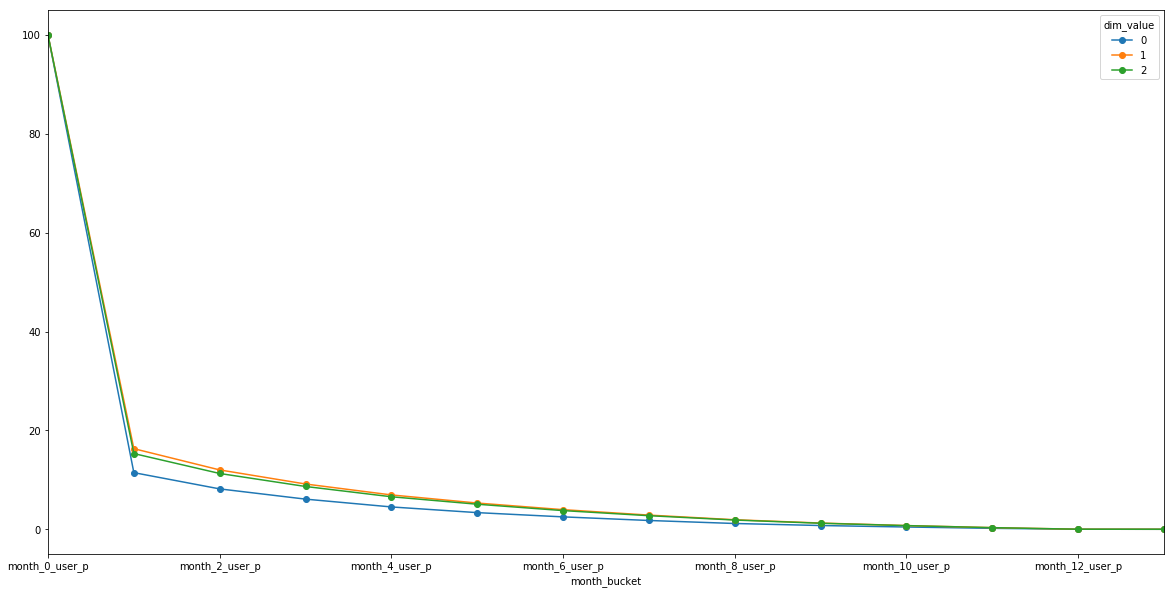

In [88]:
retention_dim_plot(df,'overall_month_gender')

### has ever refund

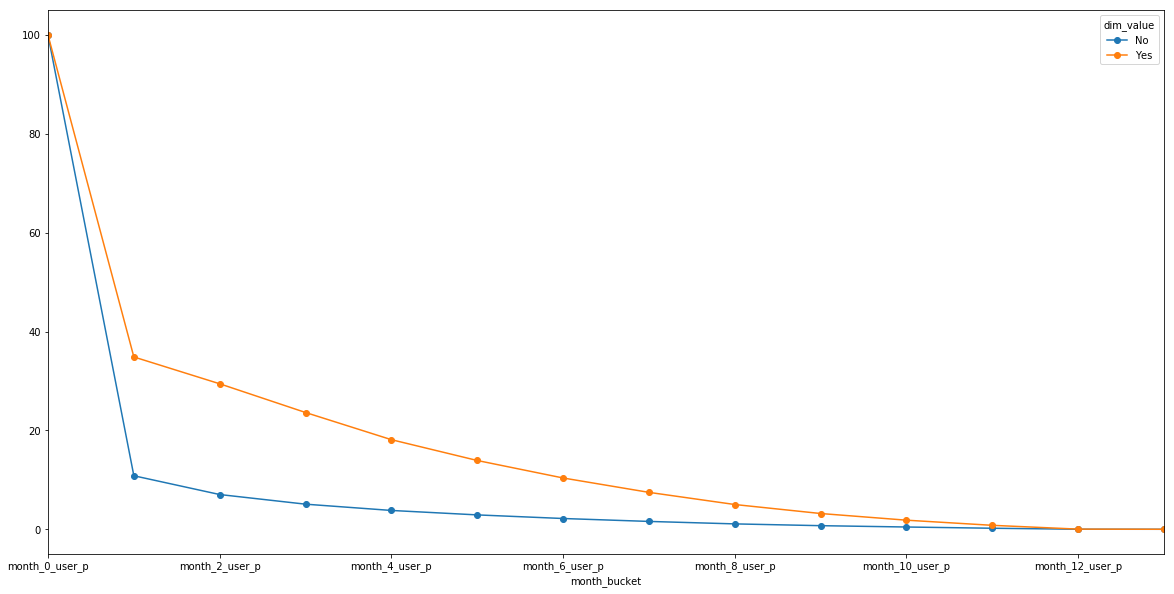

In [89]:
retention_dim_plot(df,'overall_month_has_refund')

### avg_value_bucket


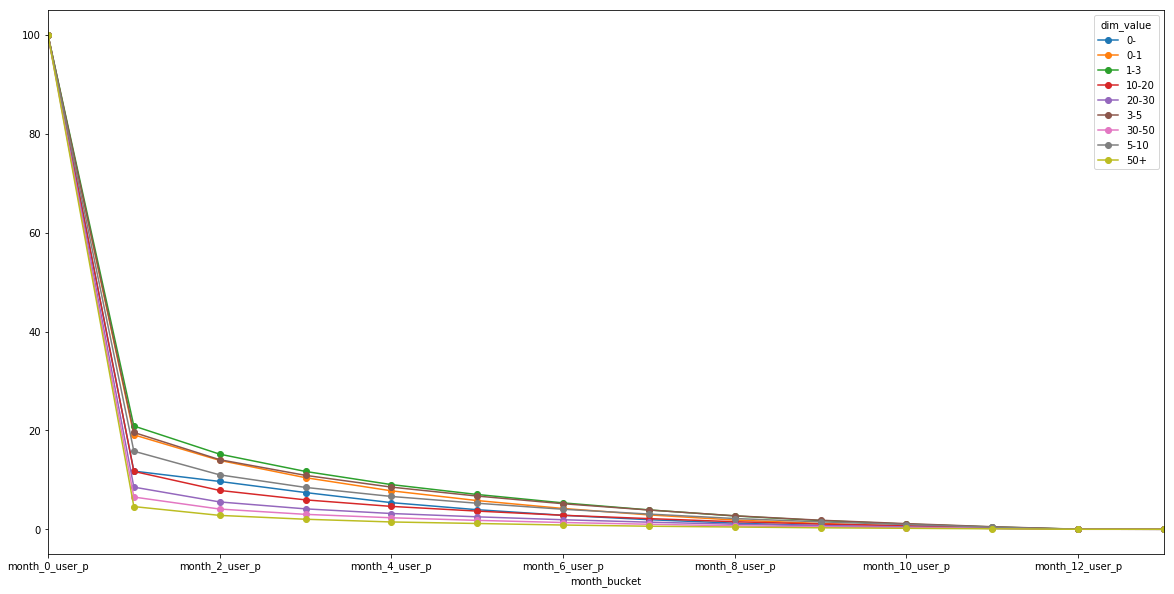

In [90]:
retention_dim_plot(df,'overall_month_value')

### dim on overall_month_domain

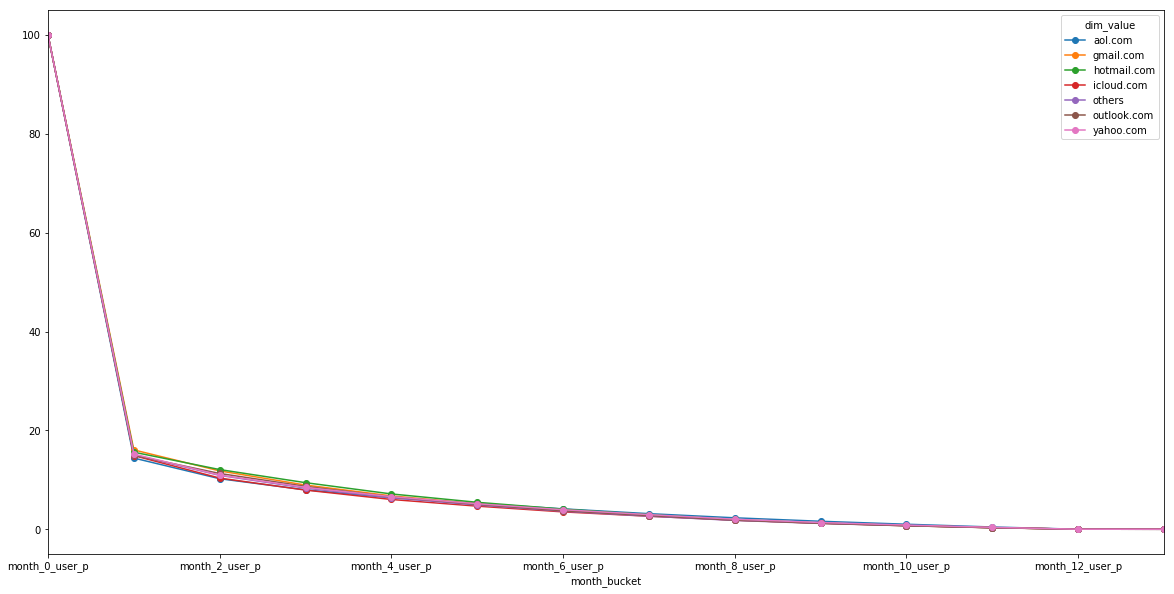

In [92]:
retention_dim_plot(df,'overall_month_domain')

### Top 6 countries

In [96]:
mask = df['dim_value'].isin(['US', 'DE', 'GB', 'FR', 'BR', 'AU'])
# mask

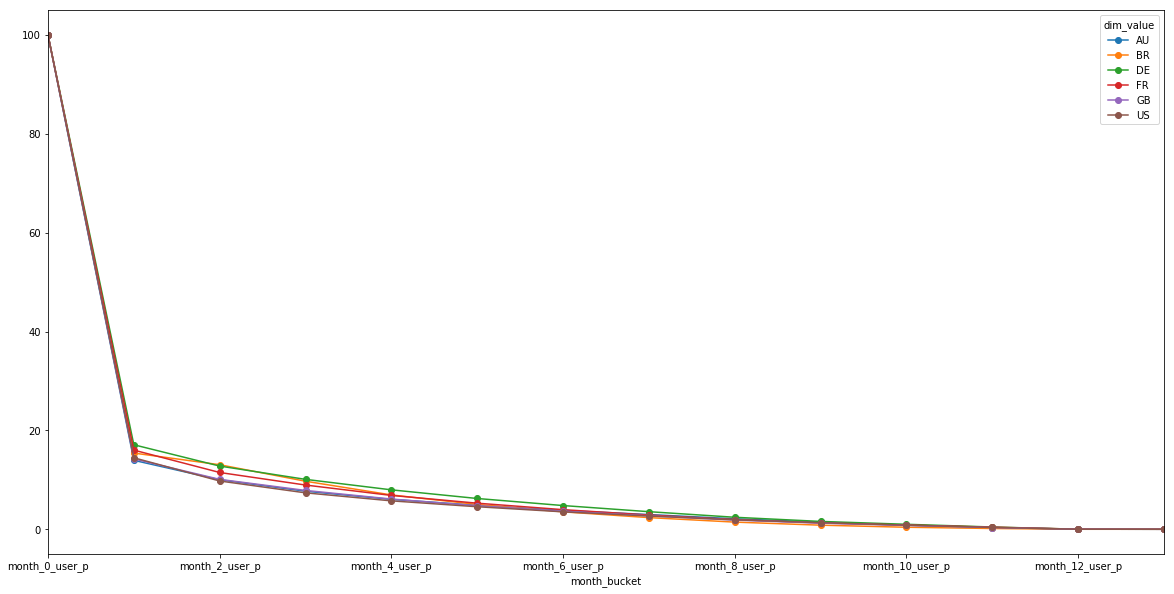

In [98]:
retention_dim_plot(df.loc[mask,:],'overall_month_country')

### if the users' 1st txn had refund expreience?

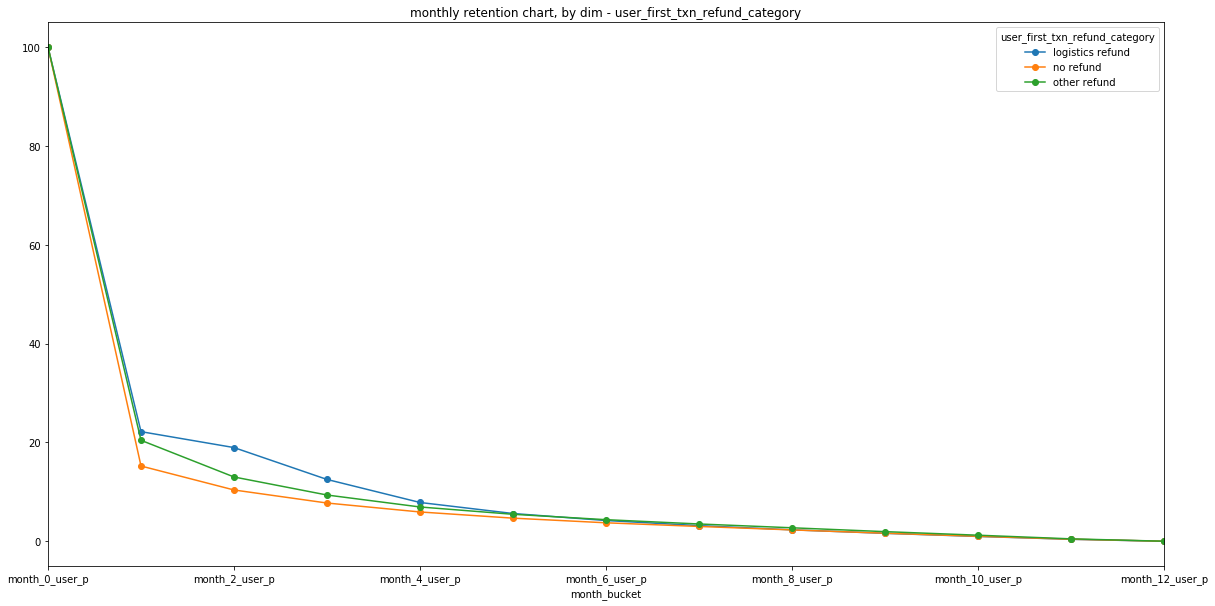

In [78]:
retention_dim_plot2(df_m,'user_first_txn_refund_category')

In [80]:
sorted(df_m.columns)

['carrier_ttd_mean_bucket',
 'carrier_ttd_med_bucket',
 'country_code',
 'cumulative_refunds_perc_bucket',
 'late_carrier_delivery_perc_bucket',
 'late_carrier_ttd_diff_mean_bucket',
 'late_mixed_delivery_perc_bucket',
 'late_mixed_ttd_diff_mean_bucket',
 'llr_bucket',
 'logistics_o_overall_refund_bucket',
 'max_ttd_shown_mean_bucket',
 'max_ttd_shown_med_bucket',
 'min_ttd_shown_mean_bucket',
 'min_ttd_shown_med_bucket',
 'mixed_ttd_mean_bucket',
 'mixed_ttd_med_bucket',
 'month_0_user',
 'month_10_user',
 'month_11_user',
 'month_12_user',
 'month_13_plus_user',
 'month_1_user',
 'month_2_user',
 'month_3_user',
 'month_4_user',
 'month_5_user',
 'month_6_user',
 'month_7_user',
 'month_8_user',
 'month_9_user',
 'user_first_txn_refund_category']

### carrier TTD 

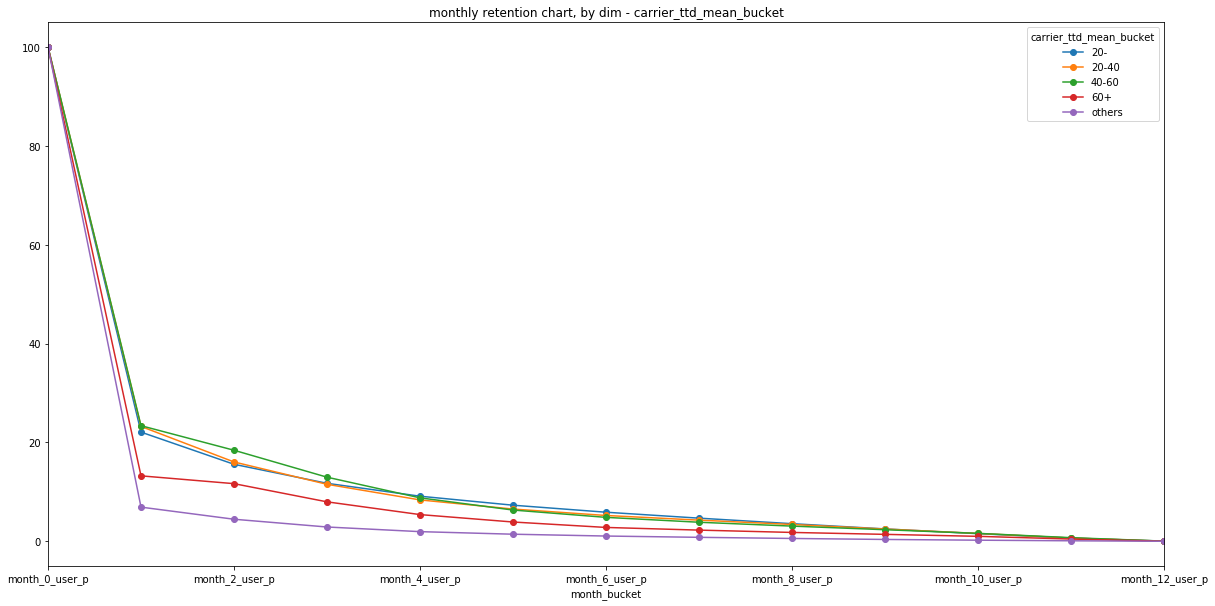

In [82]:
retention_dim_plot2(df_m,'carrier_ttd_mean_bucket')

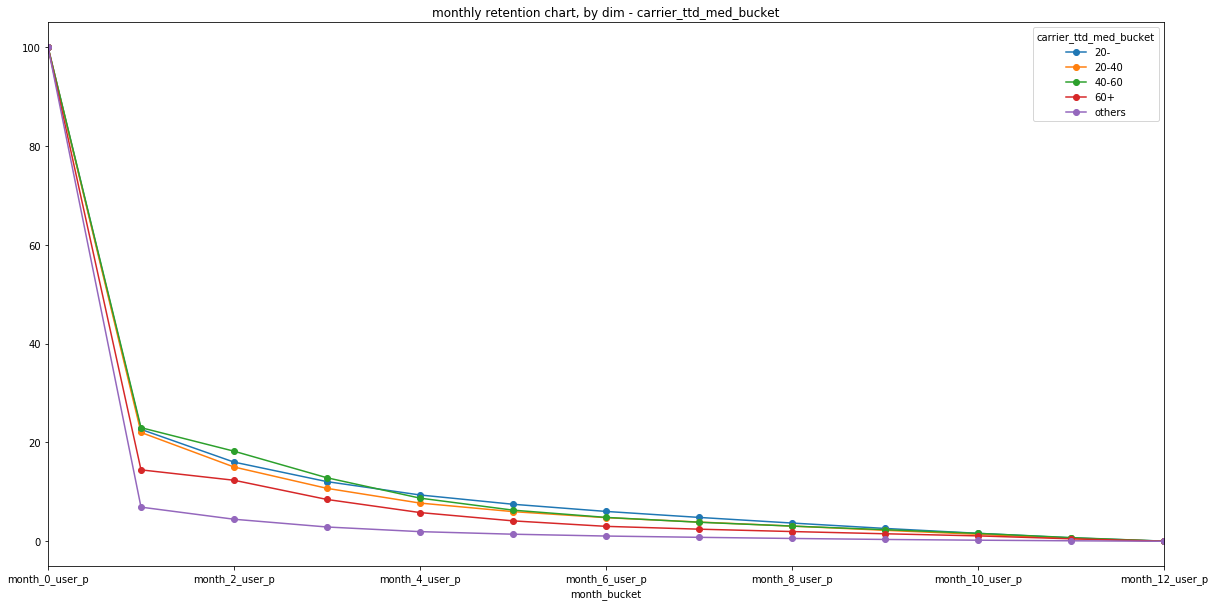

In [83]:
retention_dim_plot2(df_m,'carrier_ttd_med_bucket')

### mixed TTD


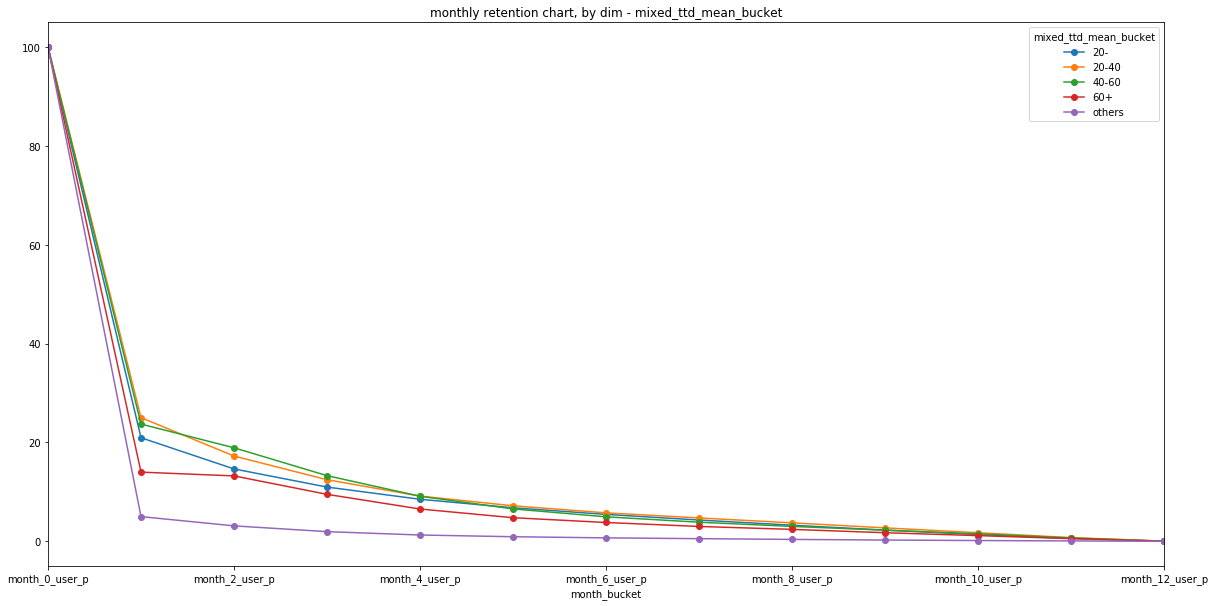

In [84]:
retention_dim_plot2(df_m,'mixed_ttd_mean_bucket')

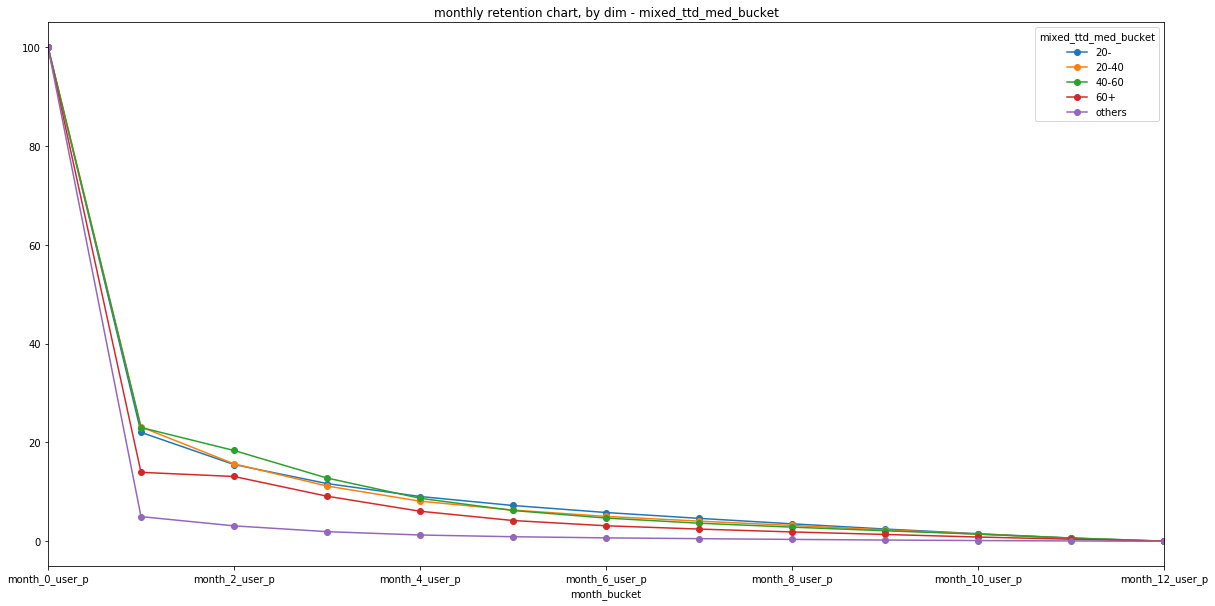

In [85]:
retention_dim_plot2(df_m,'mixed_ttd_med_bucket')

### on max_ttd_shown

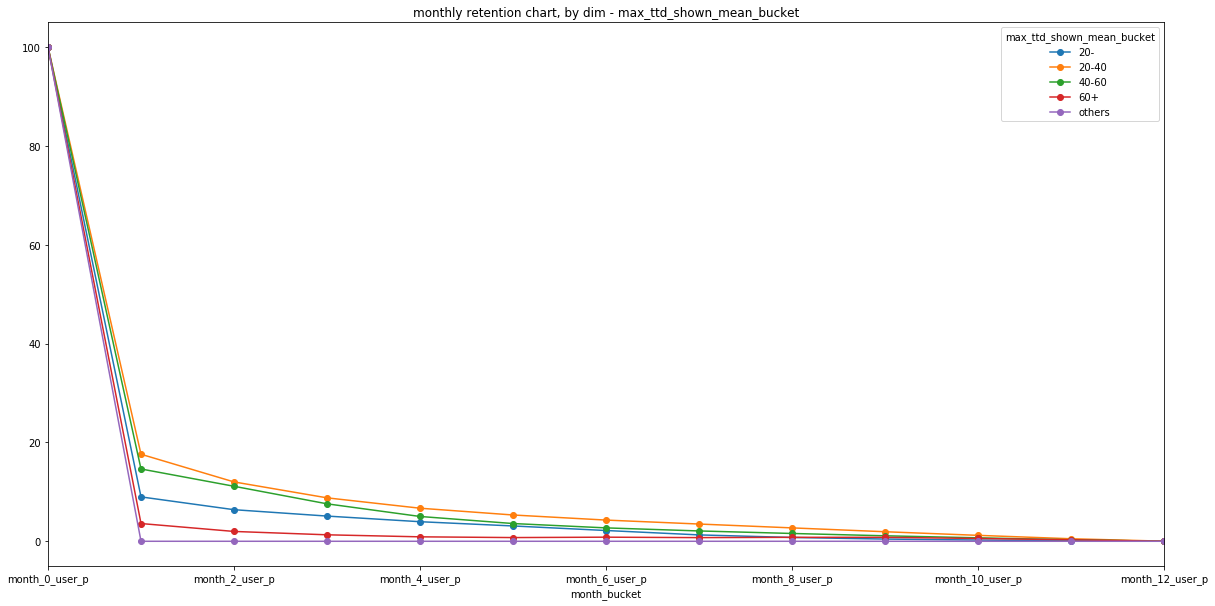

In [86]:
retention_dim_plot2(df_m,'max_ttd_shown_mean_bucket')

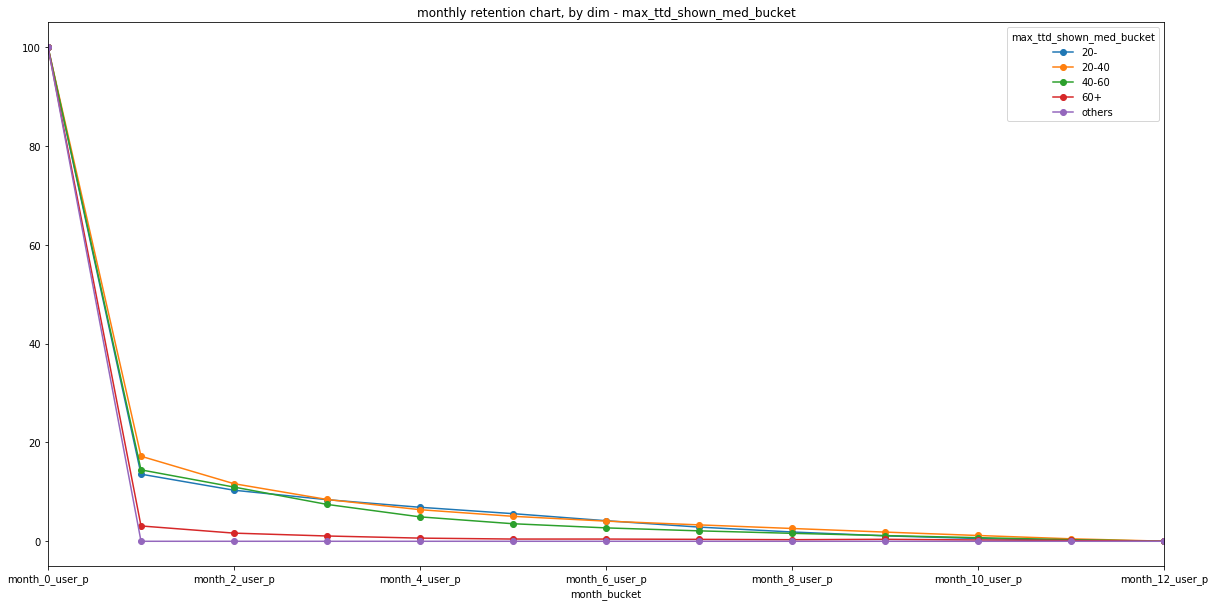

In [88]:
retention_dim_plot2(df_m,'max_ttd_shown_med_bucket')

### on min_ttd_shown

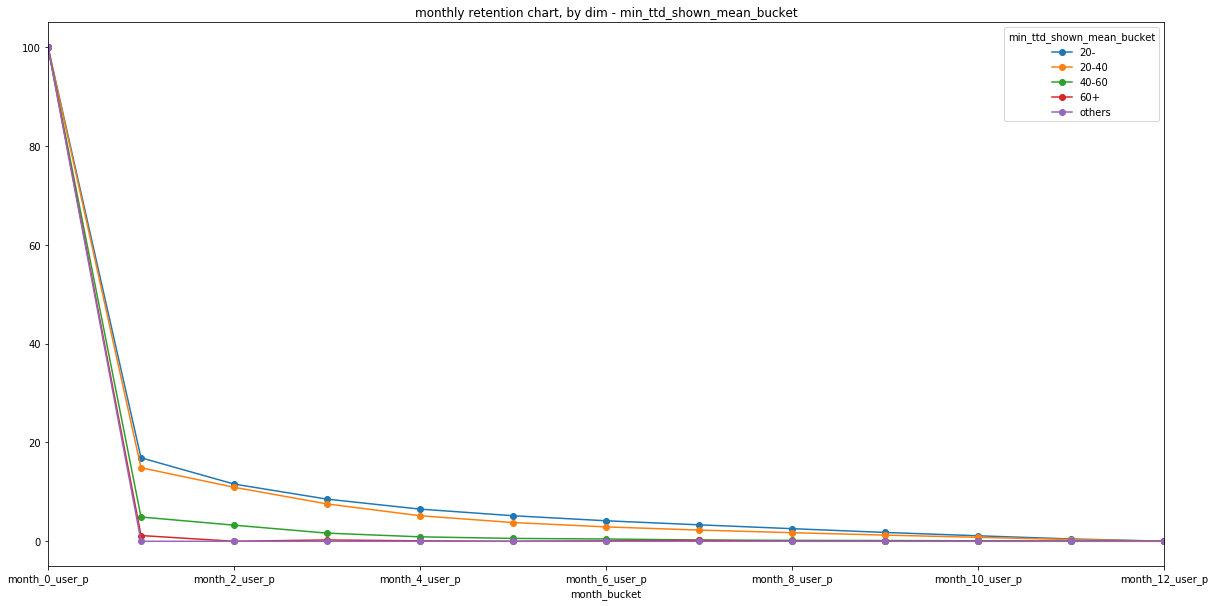

In [89]:
retention_dim_plot2(df_m,'min_ttd_shown_mean_bucket')

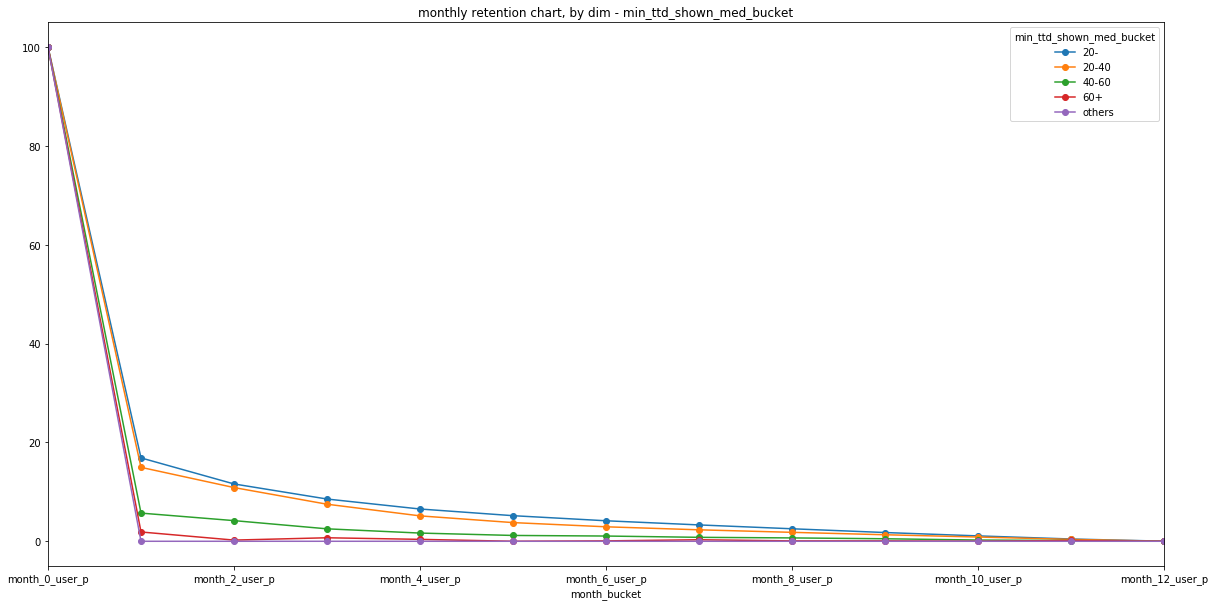

In [90]:
retention_dim_plot2(df_m,'min_ttd_shown_med_bucket')

### on cumulative refunds (normalized)

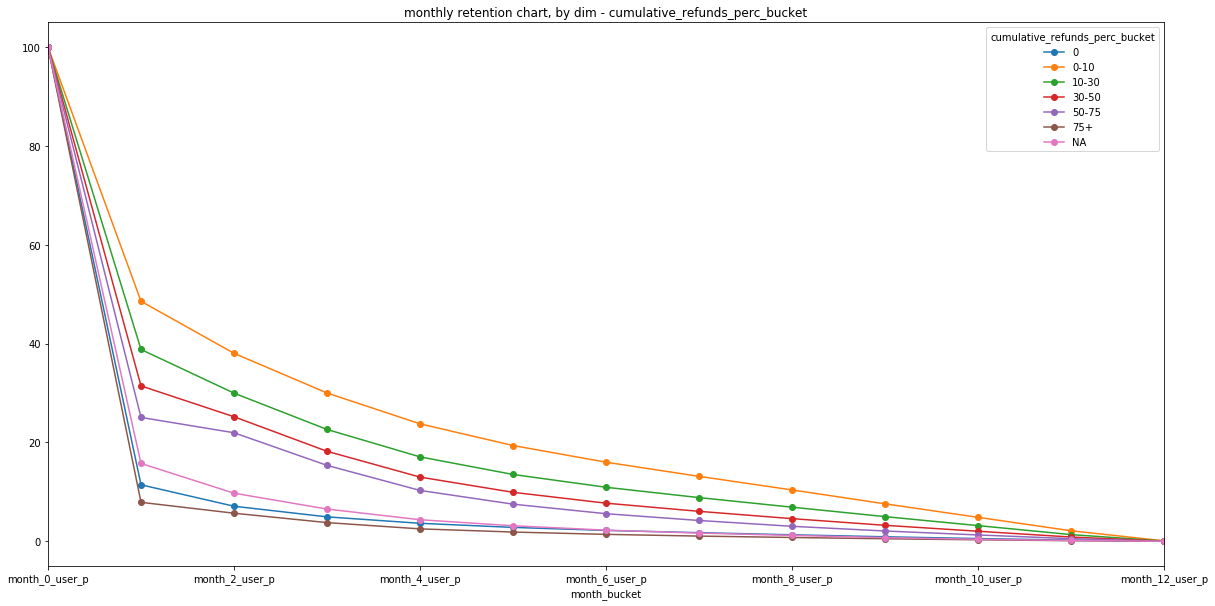

In [91]:
retention_dim_plot2(df_m,'cumulative_refunds_perc_bucket')

### on late delivery orders %

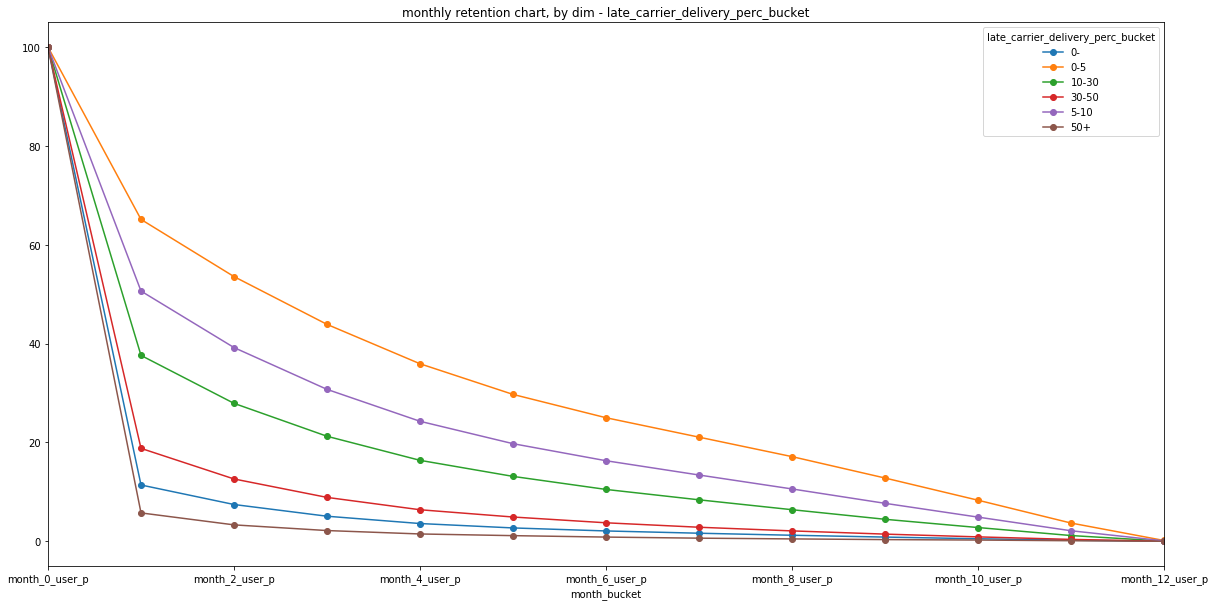

In [92]:
retention_dim_plot2(df_m,'late_carrier_delivery_perc_bucket')

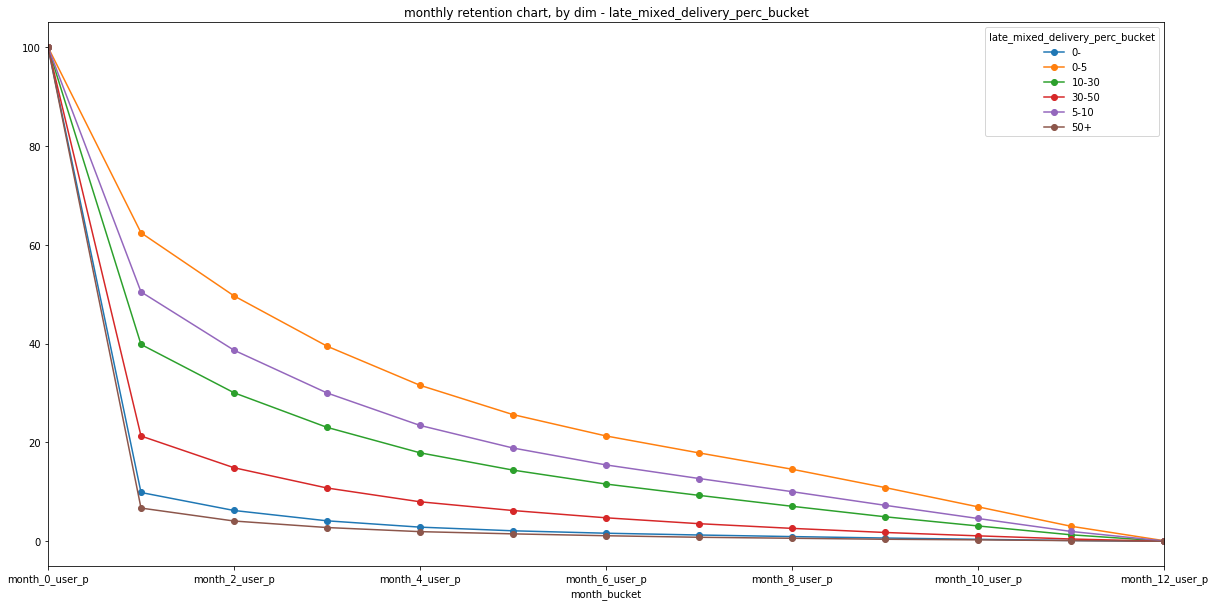

In [93]:
retention_dim_plot2(df_m,'late_mixed_delivery_perc_bucket')

### on late delivery time diff (actuall TTD - max shown TTD) 

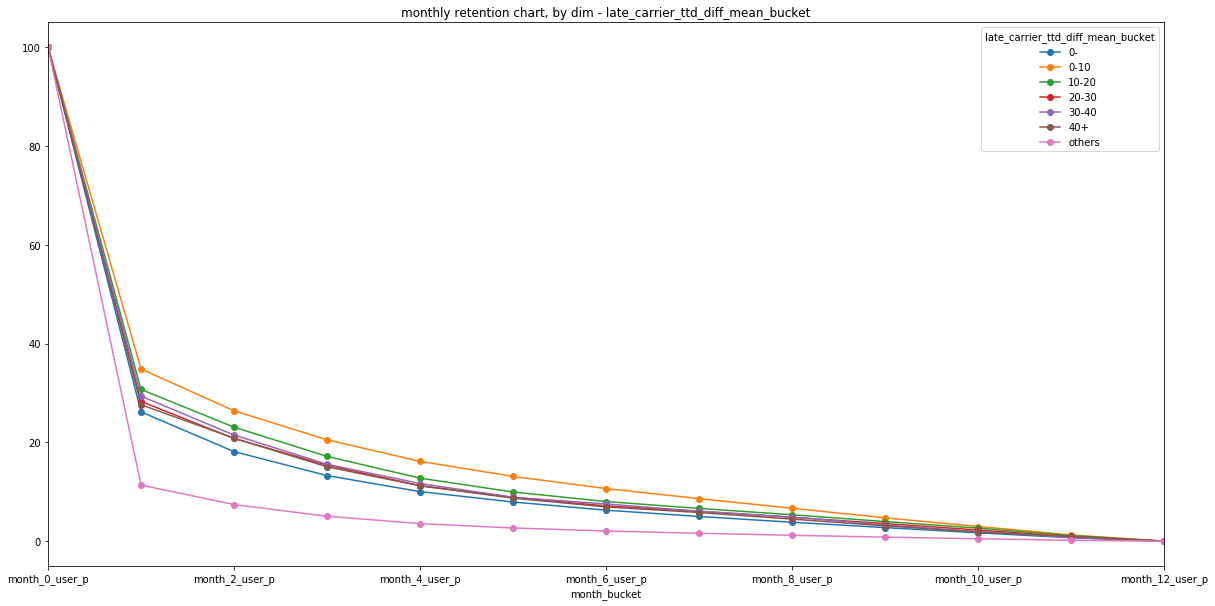

In [95]:
retention_dim_plot2(df_m,'late_carrier_ttd_diff_mean_bucket')

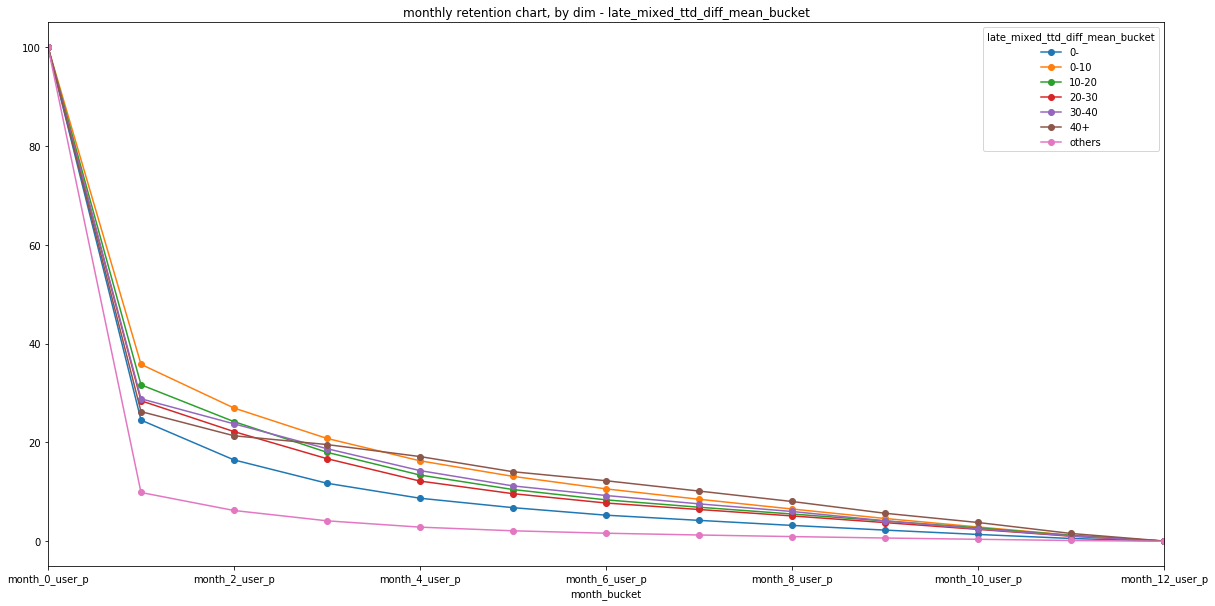

In [96]:
retention_dim_plot2(df_m,'late_mixed_ttd_diff_mean_bucket')

### on LRR buckets

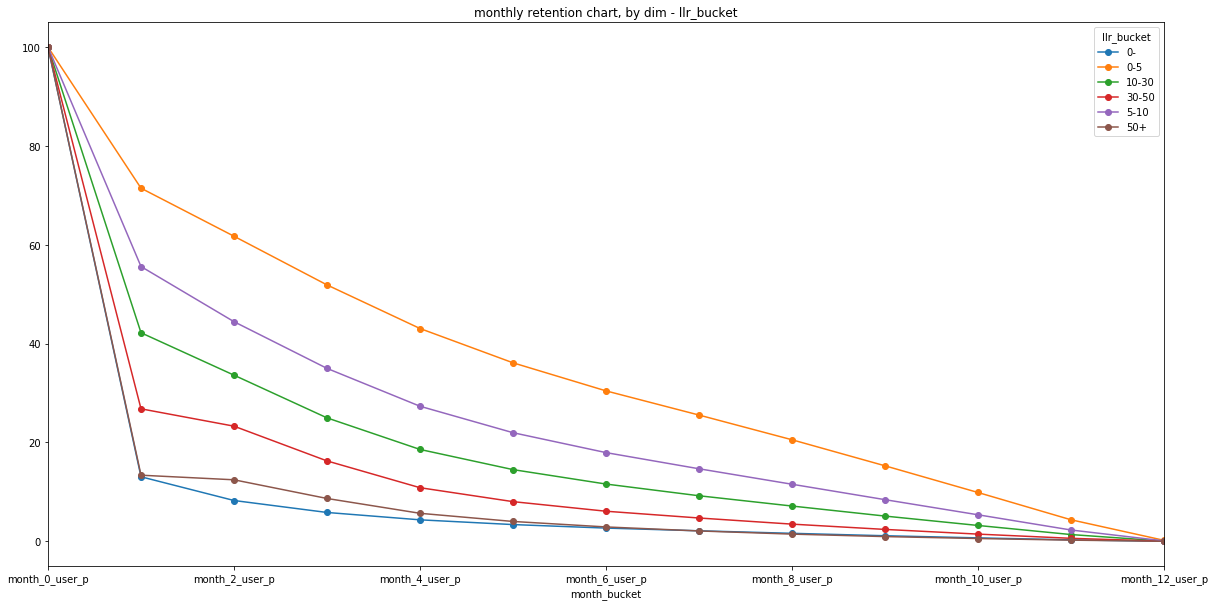

In [97]:
retention_dim_plot2(df_m,'llr_bucket')

### on logistics_o_overall_refund_bucket'

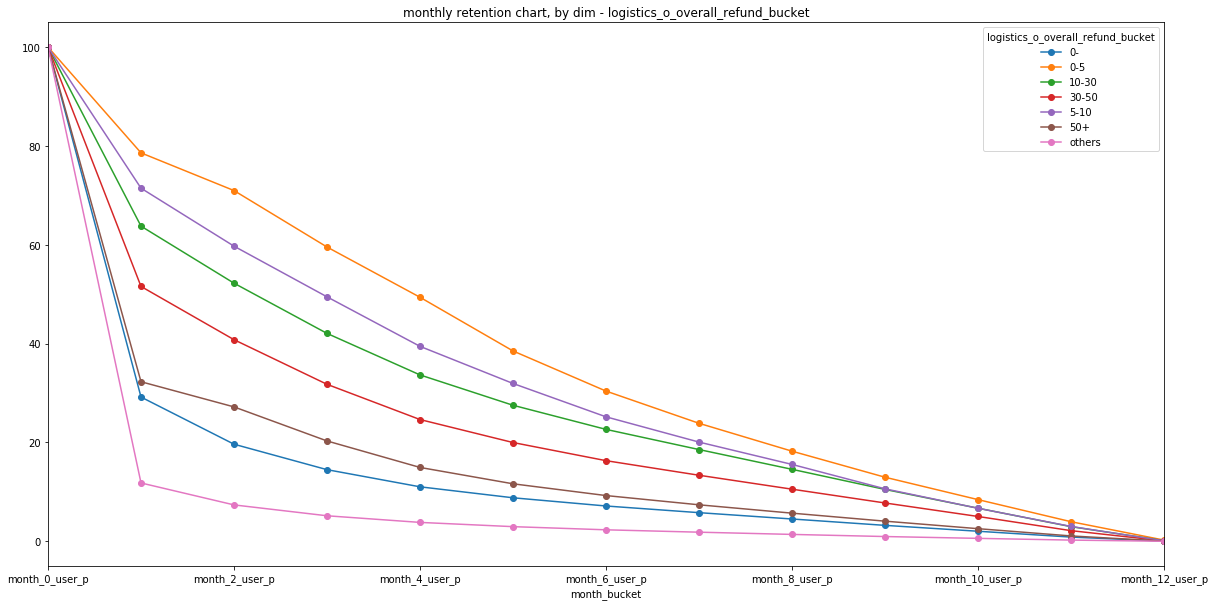

In [98]:
retention_dim_plot2(df_m,'logistics_o_overall_refund_bucket')

# conditional retention

### overall retention

In [4]:
df_cond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679830 entries, 0 to 2679829
Data columns (total 20 columns):
country_code                         object
user_first_txn_refund_category       object
cumulative_refunds_perc_bucket       object
carrier_ttd_mean_bucket              object
carrier_ttd_med_bucket               object
mixed_ttd_mean_bucket                object
mixed_ttd_med_bucket                 object
max_ttd_shown_mean_bucket            object
max_ttd_shown_med_bucket             object
min_ttd_shown_mean_bucket            object
min_ttd_shown_med_bucket             object
late_carrier_ttd_diff_mean_bucket    object
late_mixed_ttd_diff_mean_bucket      object
late_carrier_delivery_perc_bucket    object
late_mixed_delivery_perc_bucket      object
logistics_o_overall_refund_bucket    object
llr_bucket                           object
first_order_deliveried_group         object
conditional_month_bucket             object
conditional_returned_user            int64
dtypes: 

In [23]:
df_cond_overall = df_cond.groupby('conditional_month_bucket',as_index=False)['conditional_returned_user'].sum()\
                         .sort_values(by='conditional_returned_user',ascending=False).set_index('conditional_month_bucket')

conditional_month_0 = df_cond_overall.loc['conditional_month_0','conditional_returned_user']

df_cond_overall['conditional_returned_user_p'] = df_cond_overall.apply(lambda row: round(100*row['conditional_returned_user']/(conditional_month_0+0.0001),2),axis=1)

In [24]:
df_cond_overall

,conditional_returned_user,conditional_returned_user_p
conditional_month_bucket,,
conditional_month_0,11900064,100.00
conditional_month_1,2755059,23.15
conditional_month_2,1908448,16.04
conditional_month_3,1369063,11.50
conditional_month_4,1012187,8.51
conditional_month_5,781145,6.56
conditional_month_6,608516,5.11
conditional_month_7,469944,3.95
conditional_month_8,344541,2.90


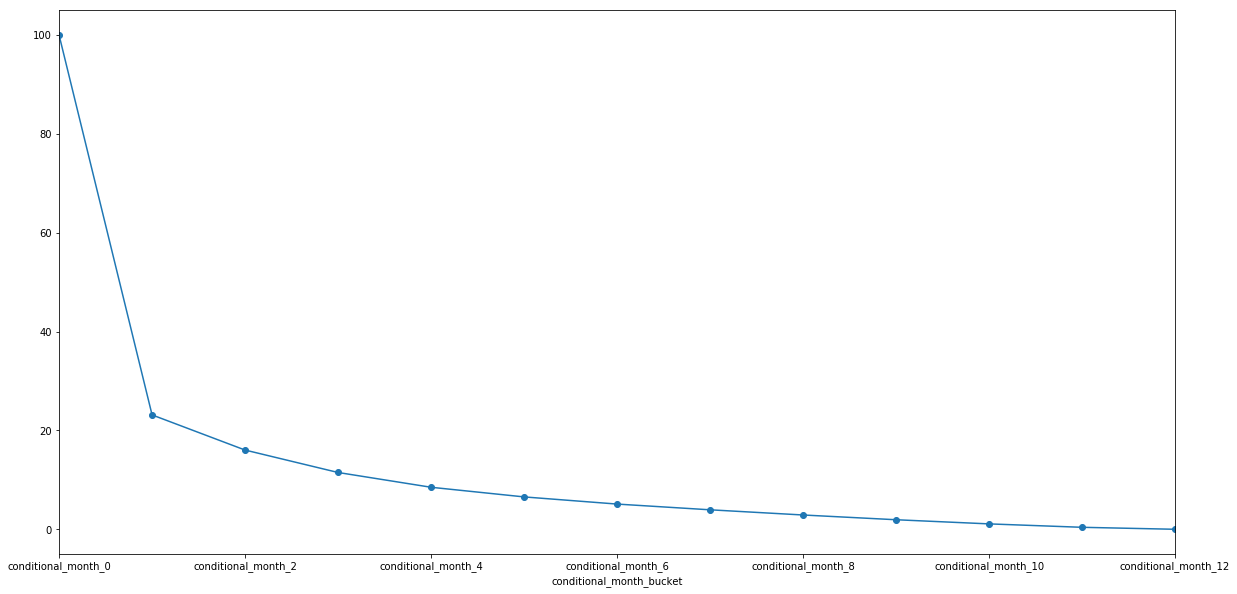

In [26]:
df_cond_overall['conditional_returned_user_p'].plot(figsize=(20,10),linestyle='-', marker='o')

In [35]:
df_cond_overall_2 = df_cond.groupby(['first_order_deliveried_group','conditional_month_bucket'],as_index=False)['conditional_returned_user'].sum()\
                         .sort_values(by=['first_order_deliveried_group','conditional_returned_user'],ascending=[False,False])
df_cond_overall_2.head()

,first_order_deliveried_group,conditional_month_bucket,conditional_returned_user
25,missing 1st delivery_time,conditional_month_0,5681735
26,missing 1st delivery_time,conditional_month_1,1176354
30,missing 1st delivery_time,conditional_month_2,823730
31,missing 1st delivery_time,conditional_month_3,581621
32,missing 1st delivery_time,conditional_month_4,422646


In [44]:
df_cond_overall_3 = df_cond_overall_2.pivot_table(columns='first_order_deliveried_group', values='conditional_returned_user', index='conditional_month_bucket')\
                    .sort_values(by='2nd order after',ascending=False)
df_cond_overall_3

first_order_deliveried_group,2nd order after,2nd order before,missing 1st delivery_time
conditional_month_bucket,,,
conditional_month_0,2154453.0,4063876.0,5681735.0
conditional_month_1,458142.0,1120563.0,1176354.0
conditional_month_2,329891.0,754827.0,823730.0
conditional_month_3,243179.0,544263.0,581621.0
conditional_month_4,183063.0,406478.0,422646.0
conditional_month_5,142927.0,316592.0,321626.0
conditional_month_6,109756.0,250589.0,248171.0
conditional_month_7,79373.0,196978.0,193593.0
conditional_month_8,52588.0,150130.0,141823.0


In [50]:
groups = ['2nd order after','2nd order before','missing 1st delivery_time']
ps = ['2nd_order_after_p','2nd_order_before_p','missing_1st_delivery_time']

for group, p in zip(groups,ps):
    y=df_cond_overall_3.loc['conditional_month_0',group]
    df_cond_overall_3[p] = df_cond_overall_3.apply(lambda row: round(100*row[group]/(y+0.0001),2),axis=1)

In [51]:
df_cond_overall_3

first_order_deliveried_group,2nd order after,2nd order before,missing 1st delivery_time,2nd_order_after_p,2nd_order_before_p,missing_1st_delivery_time
conditional_month_bucket,,,,,,
conditional_month_0,2154453.0,4063876.0,5681735.0,100.00,100.00,100.00
conditional_month_1,458142.0,1120563.0,1176354.0,21.26,27.57,20.70
conditional_month_2,329891.0,754827.0,823730.0,15.31,18.57,14.50
conditional_month_3,243179.0,544263.0,581621.0,11.29,13.39,10.24
conditional_month_4,183063.0,406478.0,422646.0,8.50,10.00,7.44
conditional_month_5,142927.0,316592.0,321626.0,6.63,7.79,5.66
conditional_month_6,109756.0,250589.0,248171.0,5.09,6.17,4.37
conditional_month_7,79373.0,196978.0,193593.0,3.68,4.85,3.41
conditional_month_8,52588.0,150130.0,141823.0,2.44,3.69,2.50


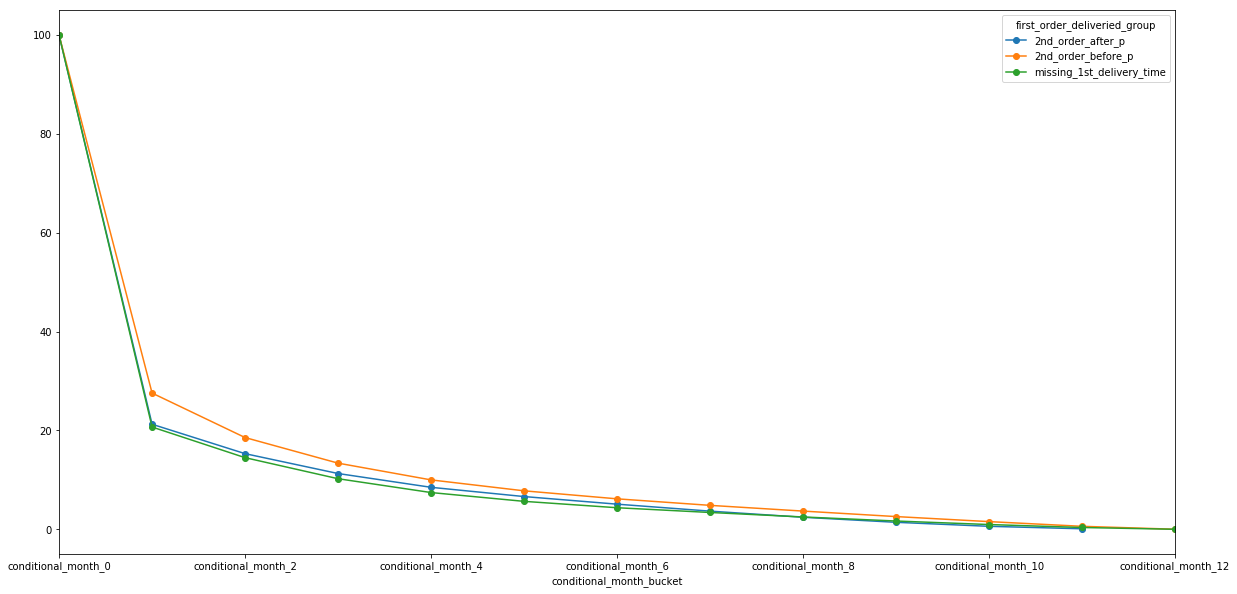

In [52]:
df_cond_overall_3[ps].plot(figsize=(20,10),linestyle='-', marker='o')

In [55]:
cs = list(set(df_cond.country_code))

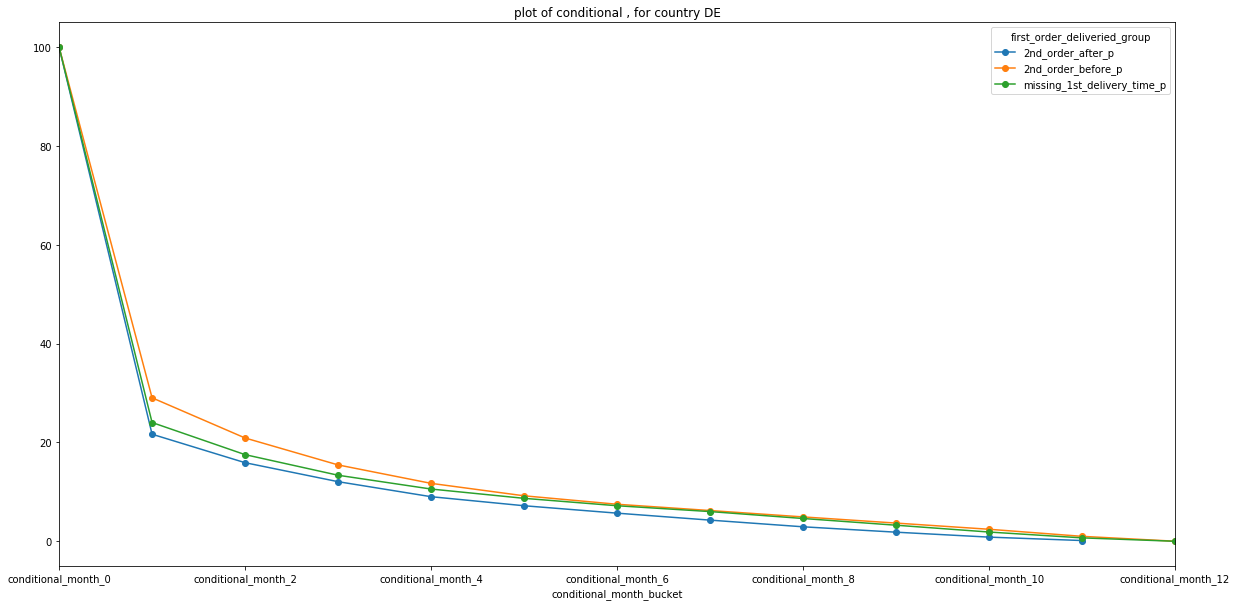

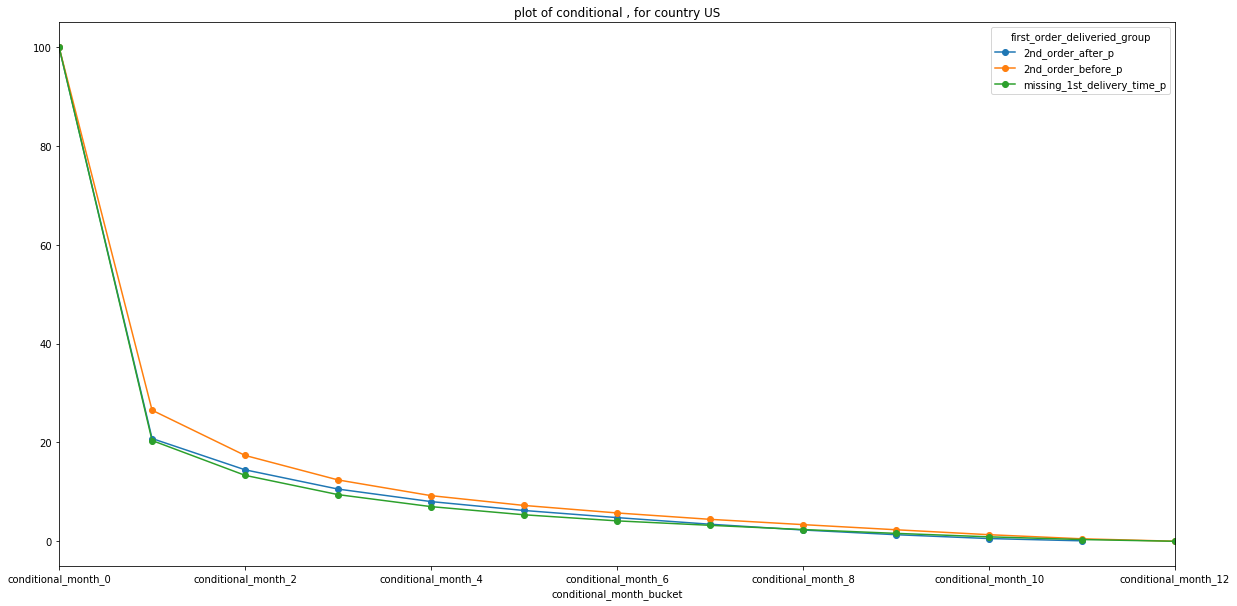

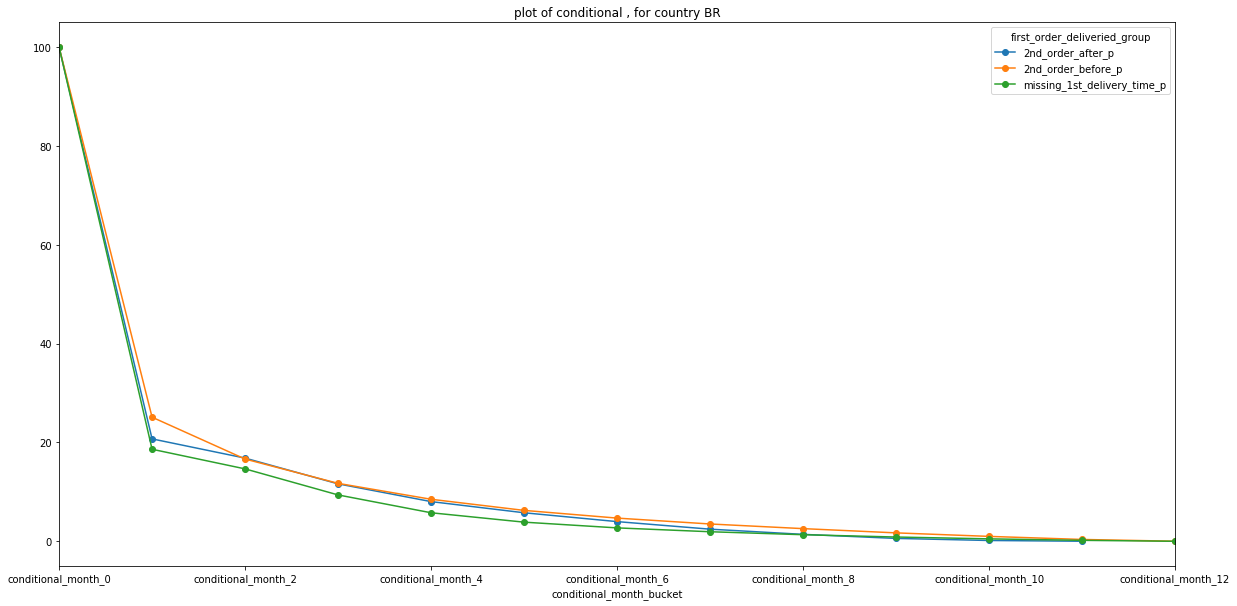

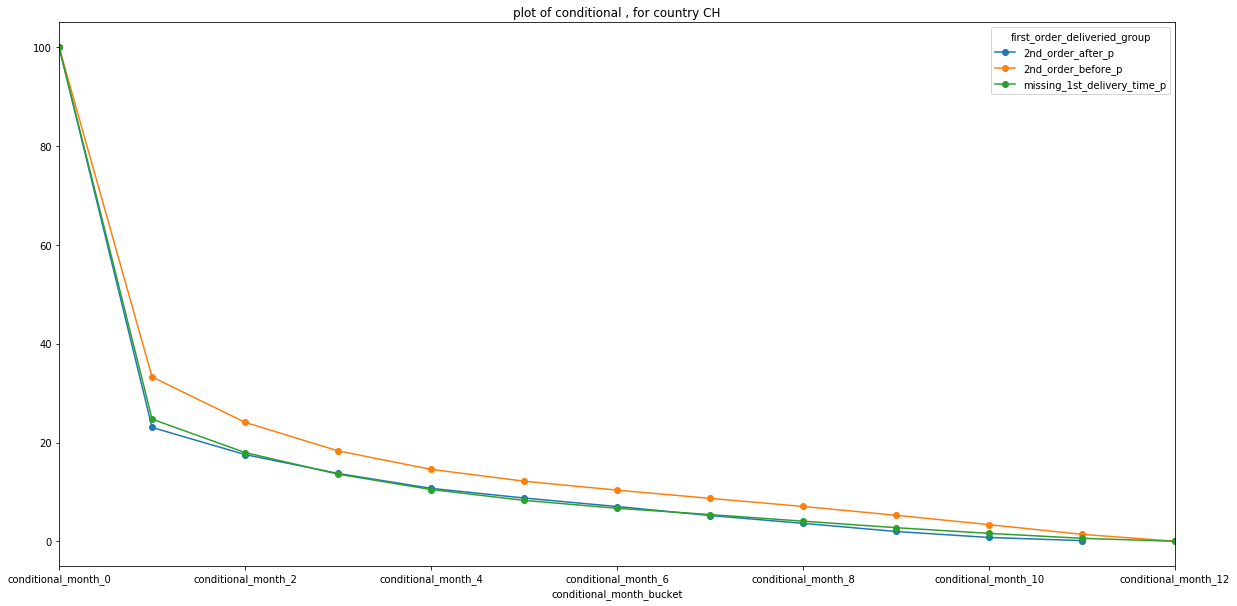

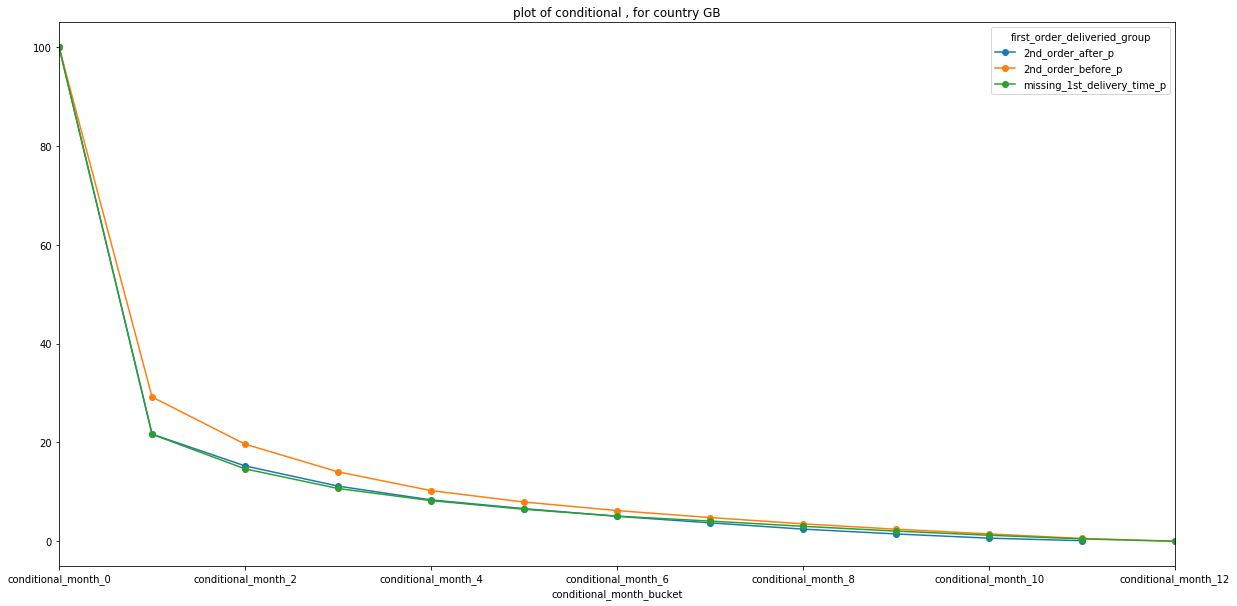

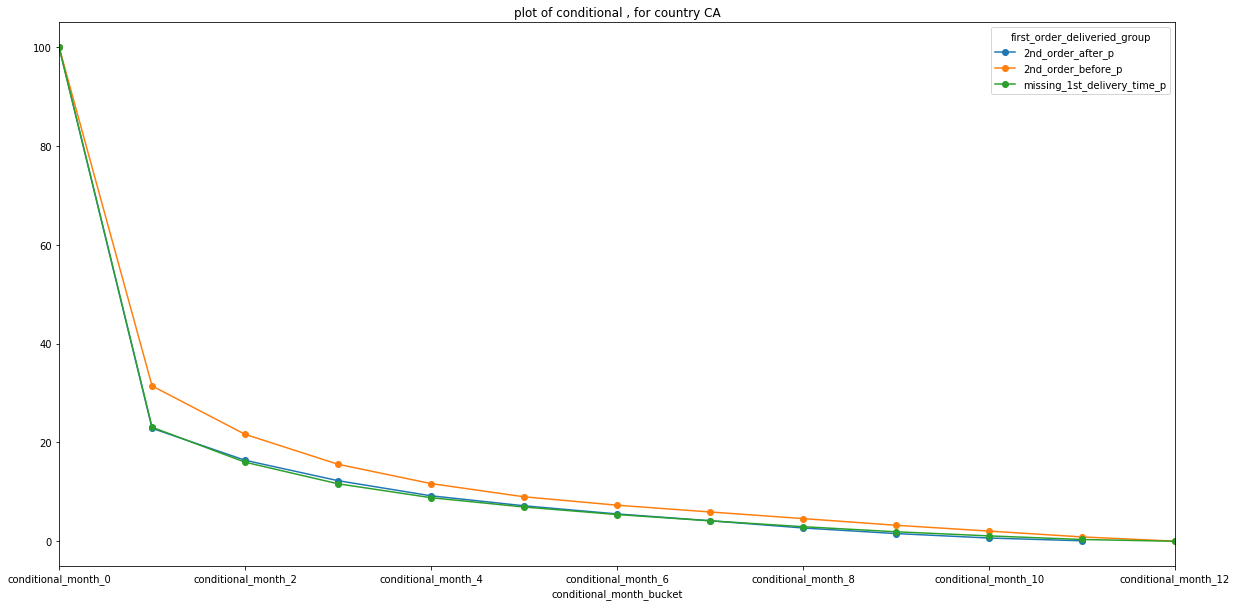

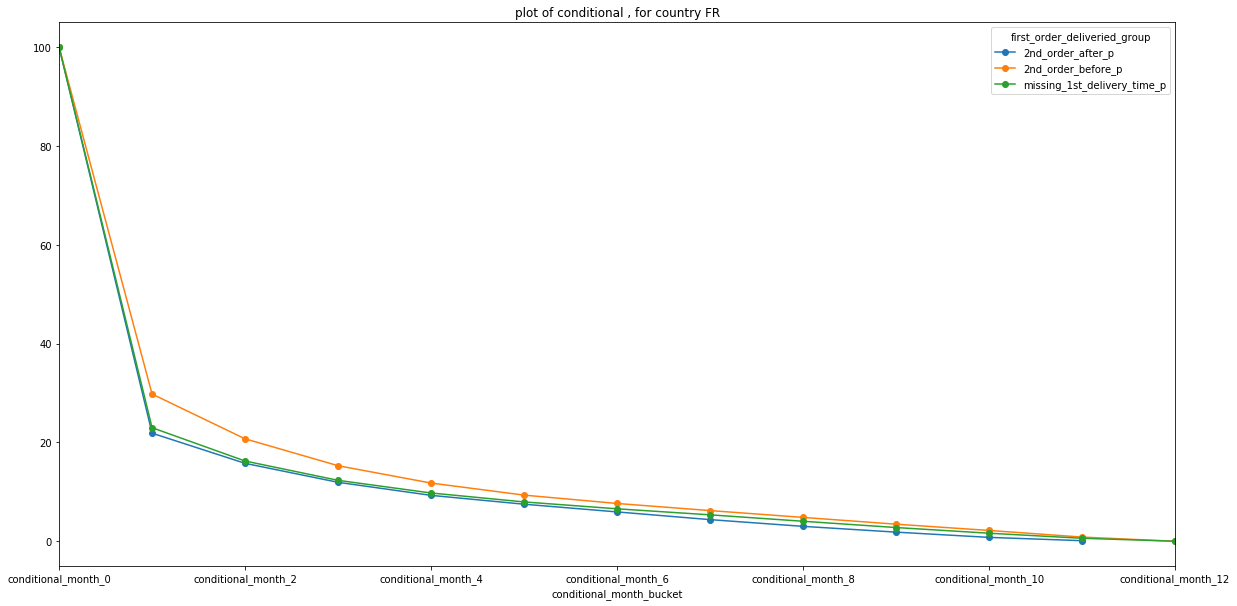

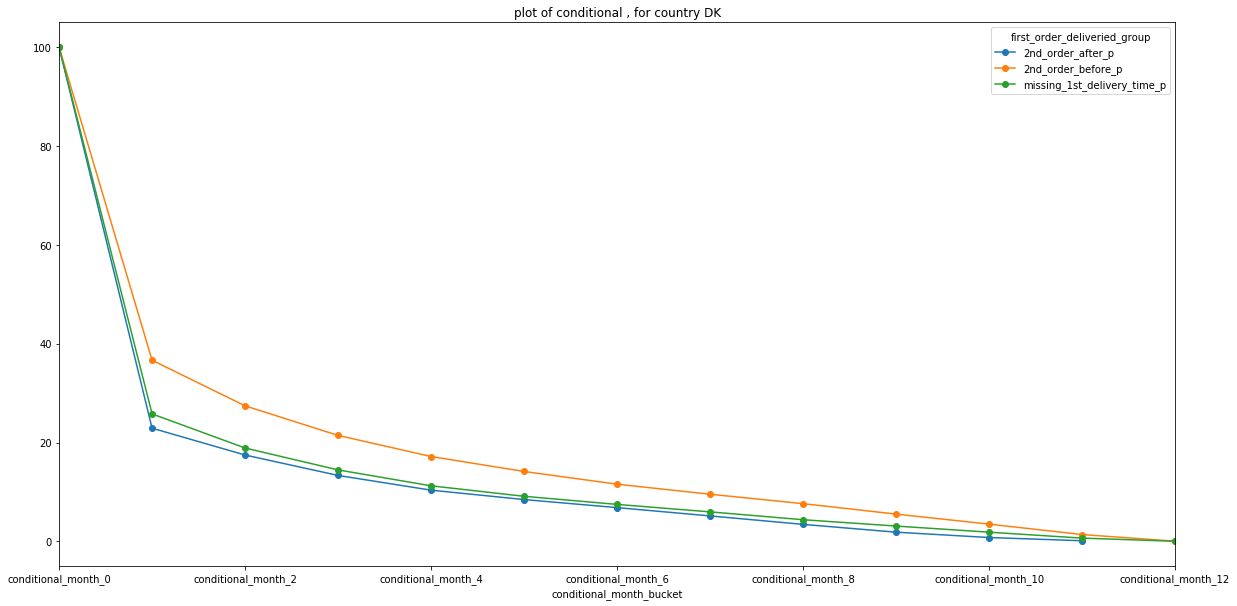

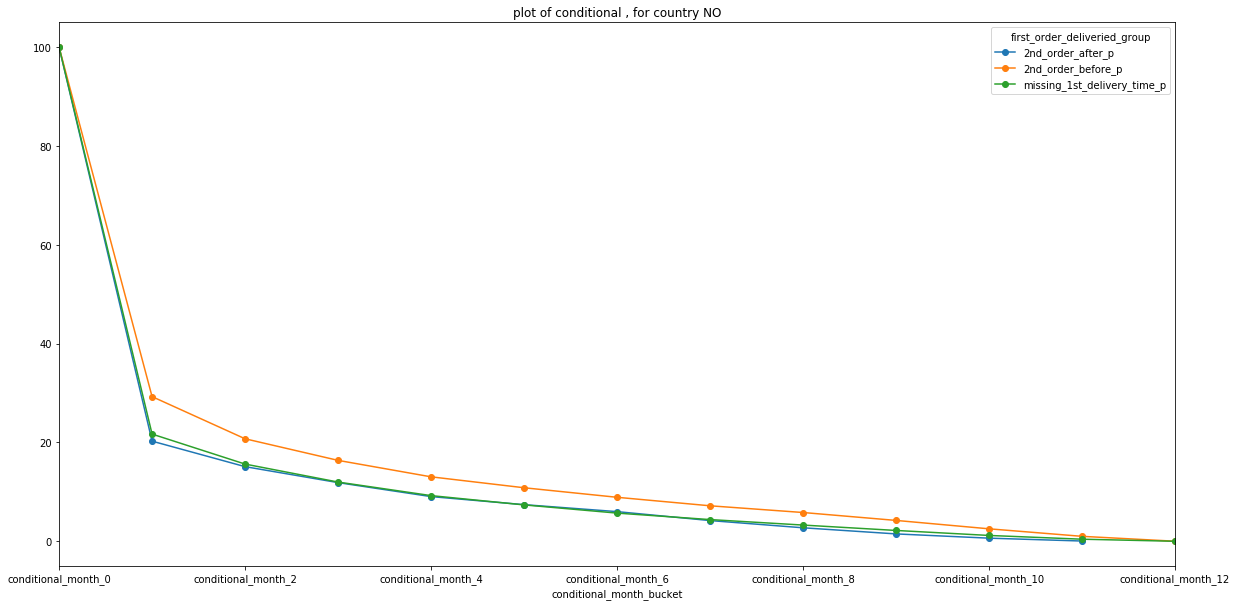

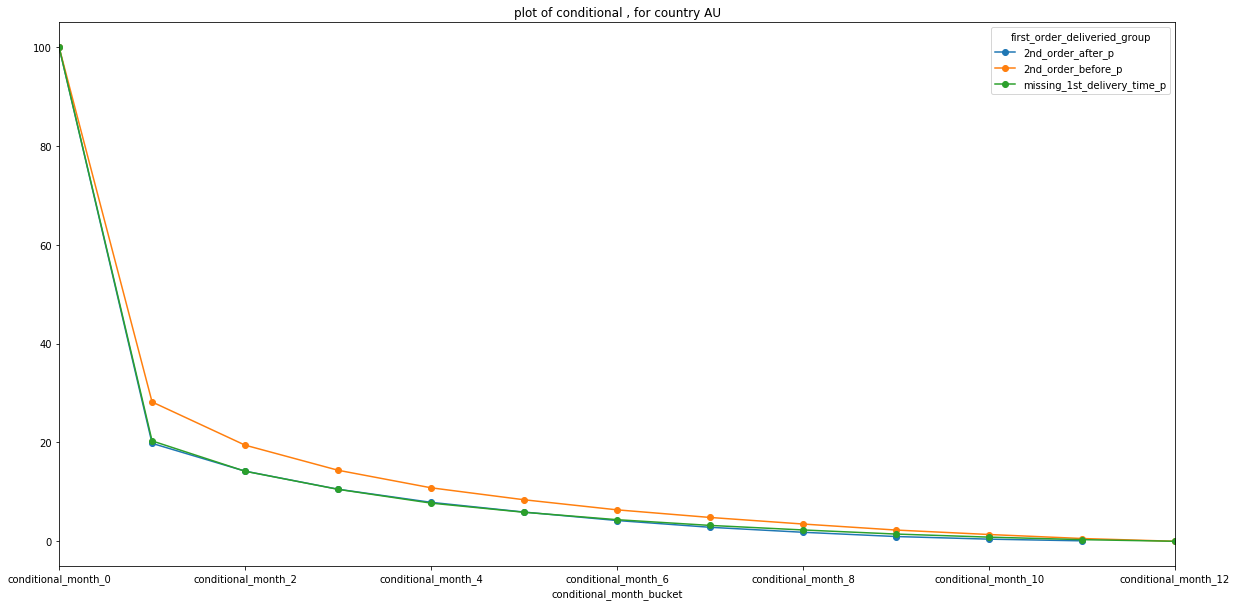

In [58]:
for c in cs:
    mask = df_cond.country_code == c
    df_cond_overall_2 = df_cond[mask].groupby(['first_order_deliveried_group','conditional_month_bucket'],as_index=False)['conditional_returned_user'].sum()\
                         .sort_values(by=['first_order_deliveried_group','conditional_returned_user'],ascending=[False,False])
    
    df_cond_overall_3 = df_cond_overall_2.pivot_table(columns='first_order_deliveried_group', values='conditional_returned_user', index='conditional_month_bucket')\
                    .sort_values(by='2nd order after',ascending=False)
    
    groups = ['2nd order after','2nd order before','missing 1st delivery_time']
    ps = ['2nd_order_after_p','2nd_order_before_p','missing_1st_delivery_time_p']

    for group, p in zip(groups,ps):
        y=df_cond_overall_3.loc['conditional_month_0',group]
        df_cond_overall_3[p] = df_cond_overall_3.apply(lambda row: round(100*row[group]/(y+0.0001),2),axis=1)
    
    df_cond_overall_3[ps].plot(figsize=(20,10),linestyle='-', marker='o',title='plot of conditional , for country {}'.format(c))